### Importing the necessary packages

In [1]:
# import the necessary packages
import tensorflow as tf
import numpy as np
import argparse
import cv2
from tensorflow.python.keras._impl.keras.applications import imagenet_utils
from tensorflow.python.keras._impl.keras.applications.inception_v3 import preprocess_input
from tensorflow.python.keras._impl.keras.preprocessing.image import img_to_array
from tensorflow.python.keras._impl.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Defining paths for the data

In [3]:
# Paths
data = 'dogscats/'
train = 'dogscats/train/'
valid = 'dogscats/valid/'
test = 'dogscats/test/'
sample = 'dogscats/sample/'
sample_train = 'dogscats/sample/train/'
sample_valid = 'dogscats/sample/valid/'

### Load pre-trained network architecture weights
Available networks: VGG16, VGG19, ResNet50, InceptionV3, Xception, MobileNet

In [3]:
model = tf.keras.applications.ResNet50(weights="imagenet")

### Set the network and input shape
The input shape and the preprocessing is slightly different for inception and xception.
<br>Available networks:
vgg16, vgg19, inception_v3, xception, resnet50, mobilenet.

In [4]:
network_name = model.name

In [5]:
if network_name in ('inception_v3', 'xception'):
    inputShape = (299, 299)
    preprocess = preprocess_input
else:
    inputShape = (224, 224)
    preprocess = imagenet_utils.preprocess_input

### Prepare the image for classification
Step 1: Convert the image to numpy array using Pillow/ PIL.
<br>Step 2: Reshape to input size (4D). The extra dimention is to covnert it batches format (m, H, W, C).
<br>Step 3: Pre-process the image.

In [15]:
# image_path = test+'test1/'+'3'+'.jpg'
image_path = 'D:\\Konverge AI\\Project Hyena\\Ela Hyena Images - Copy\\1_H_KWD_A\\IMG_1624-001.jpg'
image = load_img(image_path, target_size=inputShape)
image = img_to_array(image)

In [16]:
image = np.expand_dims(image, axis=0)

In [17]:
image = preprocess(image)

### Make prediction
Step 1: Call predict
<br>Step 2: Decode the predictions
<br>Step 3: Print the top 5 predictions and their probabilities

In [18]:
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. hyena: 96.21%
2. snow_leopard: 1.39%
3. African_hunting_dog: 1.02%
4. tiger: 0.46%
5. cheetah: 0.35%


### Show the image and the top prediction
This is done using OpenCV and matplotlib.

It's a golden_retriever (Probability: 22%)


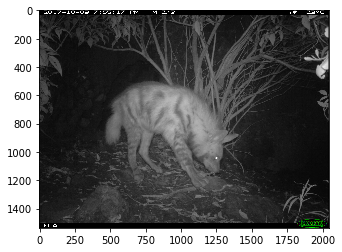

In [10]:
(imagenetID, label, prob) = P[0][0]
print("It's a "+str(label), "(Probability: "+str(int(prob*100))+"%)")
my_image = cv2.imread(image_path)
cv_rgb = cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
plt.imshow(cv_rgb)
plt.show()